#Principal Component Analysis

In [2]:
import numpy as np
from scipy.stats import chisquare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.stats import chi2_contingency



#Principal Component Analysis

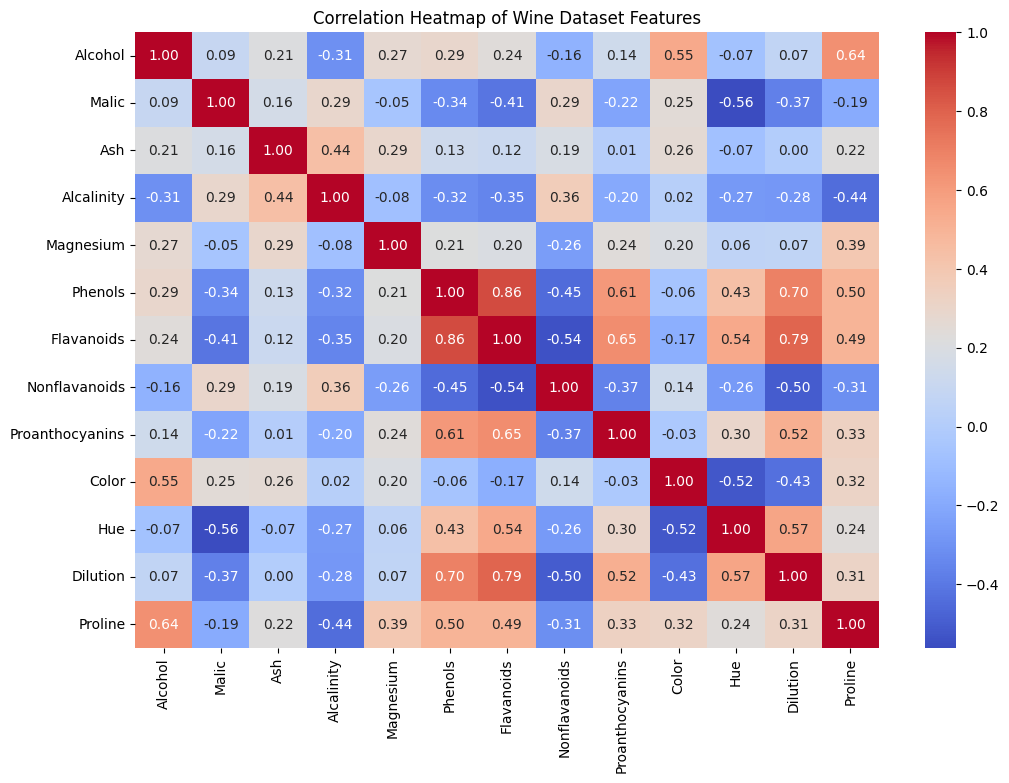

In [3]:



wine_data = pd.read_excel("wine.xlsx")

features = wine_data.drop(columns=['Type'])

correlation_matrix = features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Dataset Features")
plt.show()


Number of principal components to retain according to parallel analysis: 3


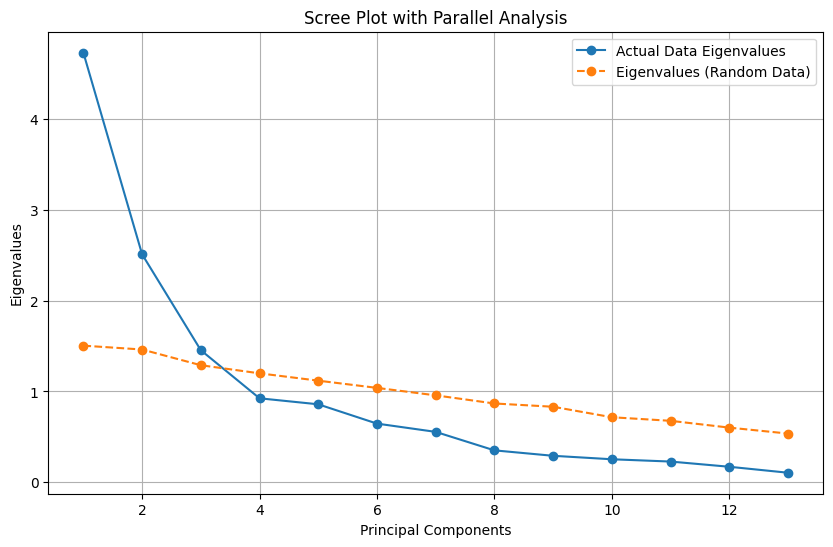

In [9]:
X = wine_data.drop(columns=['Type'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA 
pca = PCA()
pca.fit(X_scaled)
eigenvalues_actual = pca.explained_variance_

# Generate random data
random_data = np.random.normal(size=X_scaled.shape)
pca_random = PCA()
pca_random.fit(random_data)
eigenvalues_random = pca_random.explained_variance_

num_components_to_retain = np.sum(eigenvalues_actual > np.mean(eigenvalues_random))

print("Number of principal components to retain according to parallel analysis:", num_components_to_retain)

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues_actual) + 1), eigenvalues_actual, marker='o', label='Actual Data Eigenvalues')
plt.plot(range(1, len(eigenvalues_random) + 1), eigenvalues_random, marker='o', linestyle='--', label='Eigenvalues (Random Data)')
plt.title('Scree Plot with Parallel Analysis')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()


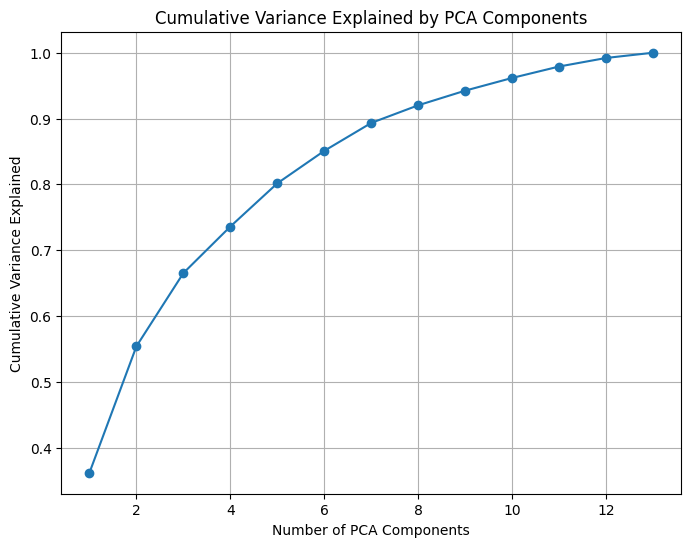

In [10]:

pca = PCA()  
pca.fit(X_scaled)

# Calculate cumulative variance 
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.show()


In [11]:

pca = PCA(n_components=3)
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio)

print("Proportion of variance explained by the first three principal components:")
for i, variance_ratio in enumerate(explained_variance_ratio):
    print("Principal Component {}: {:.2f}%".format(i+1, variance_ratio * 100))

print("\nTotal variance explained by the first three principal components: {:.2f}%".format(total_variance_explained * 100))


Proportion of variance explained by the first three principal components:
Principal Component 1: 36.20%
Principal Component 2: 19.21%
Principal Component 3: 11.12%

Total variance explained by the first three principal components: 66.53%


The first big piece of information from the PCA is that the main pattern in the data is mostly captured by the first principal component. This suggests that there's something really important that all the wines have in common, like a major characteristic or trend.

However, the second and third principal components don't explain as much about the data. It's like they're not as important. This tells us that the data isn't really spread out across many different characteristics or trends. Instead, most of what's going on can be understood by just looking at a few key things.

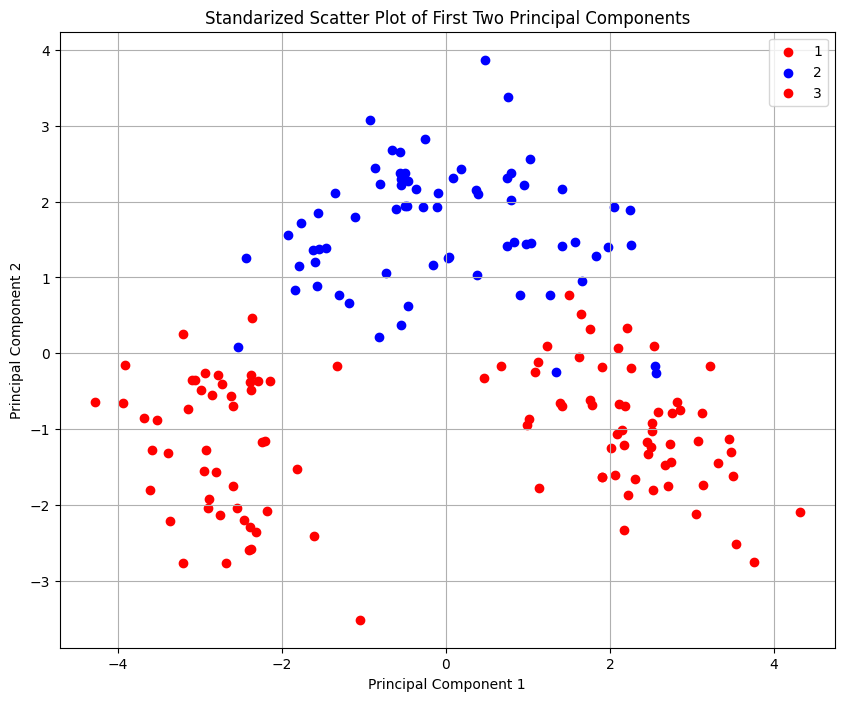

In [12]:


pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Type'] = wine_data['Type']

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
colors = ['blue', 'red'] 
for i, wine_type in enumerate(wine_data['Type'].unique()):
    plt.scatter(pca_df.loc[pca_df['Type'] == wine_type, 'PC1'], 
                pca_df.loc[pca_df['Type'] == wine_type, 'PC2'], 
                color=colors[i-1], label=wine_type)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Standarized Scatter Plot of First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


#3 Chi-Square Test - Goodness of Fit

In [79]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([59, 71, 48])

# Expected frequency assuming equal distribution
expected = np.full_like(observed, fill_value=observed.sum() / len(observed), dtype=int)
expected[-1] += observed.sum() - expected.sum()



chi2, p_value = chisquare(observed, f_exp=expected)

alpha = 0.05

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The observed distribution significantly differs from an equal distribution.")
else:
    print("Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.")


Chi-Square Statistic: 4.840677966101695
P-value: 0.08889147964660611
Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.


#Chi-Square Test - Independence

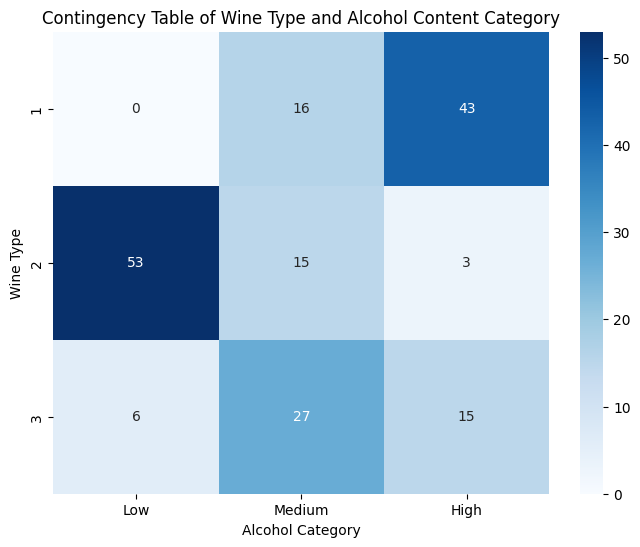

Chi-Square Statistic: 118.77146680058311
P-value: 9.77322789202807e-25
Dof:  4
Reject the null hypothesis. The type of wine and alcohol category are dependent.


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

wine_data = pd.read_excel("wine.xlsx")

low_cutoff = wine_data['Alcohol'].quantile(1/3)
medium_cutoff = wine_data['Alcohol'].quantile(2/3)

# Categorize 'Alcohol' content
wine_data['Alcohol Category'] = pd.cut(wine_data['Alcohol'], bins=[0, low_cutoff, medium_cutoff, float('inf')],
                                       labels=['Low', 'Medium', 'High'], right=False)


contingency_table = pd.crosstab(wine_data['Type'], wine_data['Alcohol Category'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Alcohol Category')
plt.ylabel('Wine Type')
plt.title('Contingency Table of Wine Type and Alcohol Content Category')
plt.show()


# Perform Chi-Squared Test 
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Dof: ",  dof)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The type of wine and alcohol category are dependent.")
else:
    print("Fail to reject the null hypothesis. The type of wine and alcohol category are independent.")
